#### =============================================================================
### Copyright 2025. Somjit Roy and Pritam Dey. 
### This program implements the TAVIE algorithm as developed in:
### Roy, S., Dey, P., Pati, D., and Mallick, B.K.
### 'A Generalized Tangent Approximation Framework for Strongly Super-Gaussian Likelihoods',
### arXiv:2504.05431 <https://arxiv.org/abs/2504.05431>.
###
### Authors:
###   Somjit Roy (<sroy_123@tamu.edu>) and Pritam Dey (<pritam.dey@tamu.edu>)
#### =============================================================================

In [1]:
# Required imports
import numpy as np
from TAVIE import *
import pandas as pd
import rich
from sklearn.preprocessing import scale
from IPython.display import display, Latex
import matplotlib.pyplot as plt

### Test for TAVIE on Laplace likelihood (SSG Type I)

╭─ TAVIE Fit for laplace ─╮
│  Starting TAVIE fit!    │
╰─────────────────────────╯

Converged in 108 iterations.
-------------True parameters----------
beta: [ 0.74294998 -0.86715546 -0.22419775  1.26358033  0.98658607  1.257036  ]
tau2: 8


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

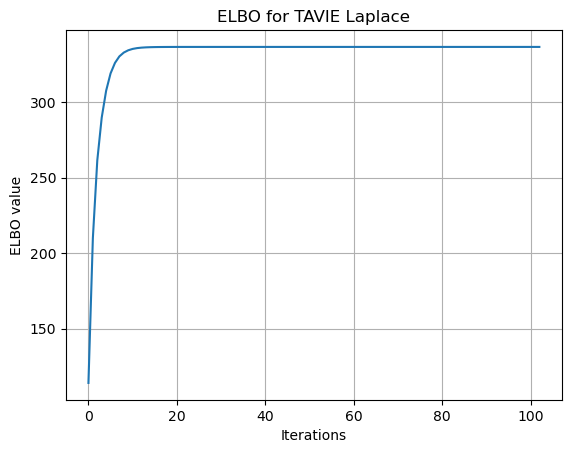

In [2]:
# Simulated data
n = 10000
p = 5
tau2 = 8

# Design matrix, true regression coefficients and response
X = np.random.normal(size=(n, p))
beta_true = np.random.normal(loc=0.0, scale=1.0, size=p+1)
error = np.random.laplace(size=n, loc=0.0, scale = 1/np.sqrt(tau2))
y = beta_true[0] + X @ beta_true[1:len(beta_true)] + error

# Initialize the TAVIE model for laplace likelihood
laplace_model = TAVIE_loc_scale(family="laplace", fit_intercept=True)
laplace_model.fit(X, y, verbose=True) # fit the TAVIE model

# true parameters
print("-------------True parameters----------")
print(f"beta: {beta_true}")
print(f"tau2: {tau2}")

laplace_model.get_TAVIE_means() # get the TAVIE estimates
ELBO = laplace_model.get_elbo() # get the ELBO across iterations
# obtain the variational parameter estimates; use variational_estimates as required
variational_estimates = laplace_model.get_variational_estimates()

plt.figure()
plt.plot(ELBO[6:len(ELBO)])
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.title("ELBO for TAVIE Laplace")
plt.grid(True)
plt.show()

### Test for TAVIE on Student's-t likelihood (SSG Type I)

╭─ TAVIE Fit for student ─╮
│  Starting TAVIE fit!    │
╰─────────────────────────╯

Converged in 33 iterations.
-------------True parameters----------
beta: [-0.57315065 -2.59722975  0.09529235 -1.47627448 -0.11716572 -1.50367712]
tau2: 8


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

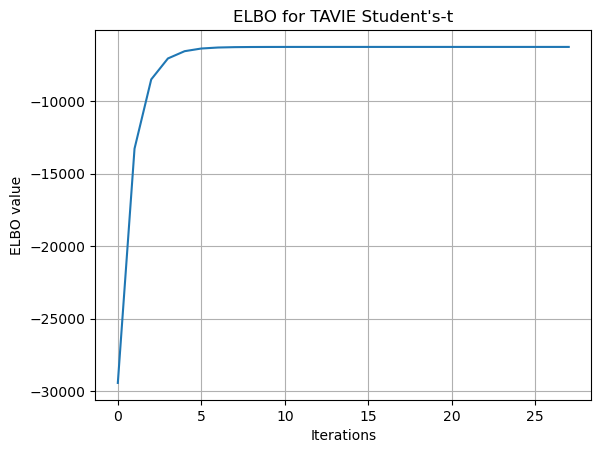

In [3]:
# Simulated data
n = 10000
p = 5
tau2 = 8
df = 5

# Design matrix, true regression coefficients and response
X = np.random.normal(size=(n, p))
beta_true = np.random.normal(loc=0.0, scale=1.0, size=p+1)
error =  np.random.standard_t(size = n, df = df) * 1/np.sqrt(tau2)
y = beta_true[0] + X @ beta_true[1:len(beta_true)] + error

# Initialize the TAVIE model for student's-t likelihood
student_model = TAVIE_loc_scale(family="student", fit_intercept=True)
student_model.fit(X, y, nu=df, verbose=True) # fit the TAVIE model

# true parameters
print("-------------True parameters----------")
print(f"beta: {beta_true}")
print(f"tau2: {tau2}")

student_model.get_TAVIE_means() # get the TAVIE estimates
ELBO = student_model.get_elbo() # get the ELBO across iterations
# obtain the variational parameter estimates; use variational_estimates as required
variational_estimates = student_model.get_variational_estimates()

plt.figure()
plt.plot(ELBO[6:len(ELBO)])
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.title("ELBO for TAVIE Student's-t")
plt.grid(True)
plt.show()

### Test for TAVIE on Binomial (Logistic) likelihood (SSG Type I)

╭─ TAVIE Fit for binomial ─╮
│  Starting TAVIE fit!     │
╰──────────────────────────╯

Converged in 81 iterations.
-------------True parameters----------
beta: [-1.32490468  0.49463403  1.5671113  -1.60949456 -0.73050989  0.33223319]


<IPython.core.display.Latex object>

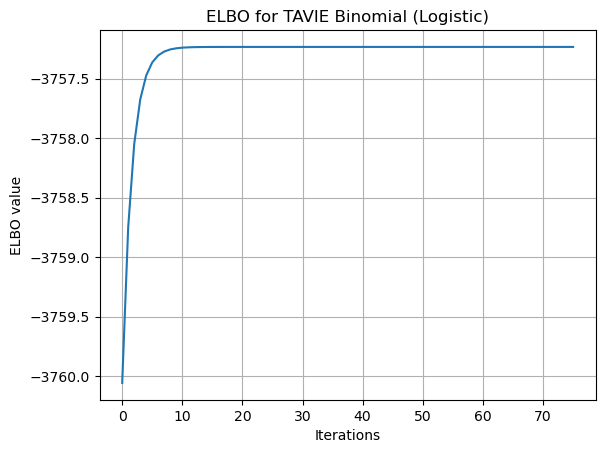

In [4]:
# Simulated data
n = 10000
p = 5

# Design matrix, true regression coefficients and response
X = np.random.normal(size=(n, p))
beta_true = np.random.normal(loc=0.0, scale=1.0, size=p+1)
linear_term  = beta_true[0] + X @ beta_true[1:len(beta_true)] 
probs = 1 / (1 + np.exp(-linear_term))
y = np.random.binomial(1, probs, size=n)

# Initialize the TAVIE model for binomial (logistic) likelihood
logit_model = TAVIE_type_II(family="binomial", fit_intercept=True)
logit_model.fit(X, y, r = 1, verbose=True) # fit the TAVIE model

# true parameters
print("-------------True parameters----------")
print(f"beta: {beta_true}")

logit_model.get_TAVIE_means(verbose=True) # get the TAVIE estimates
# obtain the variational estimates; use as required
variational_estimates = logit_model.get_variational_estimates()
ELBO = logit_model.get_elbo() # obtain the ELBO over iterations

plt.figure()
plt.plot(ELBO[6:len(ELBO)])
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.title("ELBO for TAVIE Binomial (Logistic)")
plt.grid(True)
plt.show()

## Test for TAVIE on Negative-Binomial likelihood (SSG Type I)

╭─ TAVIE Fit for negbin ─╮
│  Starting TAVIE fit!   │
╰────────────────────────╯

Converged in 426 iterations.
-------------True parameters----------
beta: [-0.06481038  0.172697    0.8701684   1.86228434  0.88885458 -0.88581071]


<IPython.core.display.Latex object>

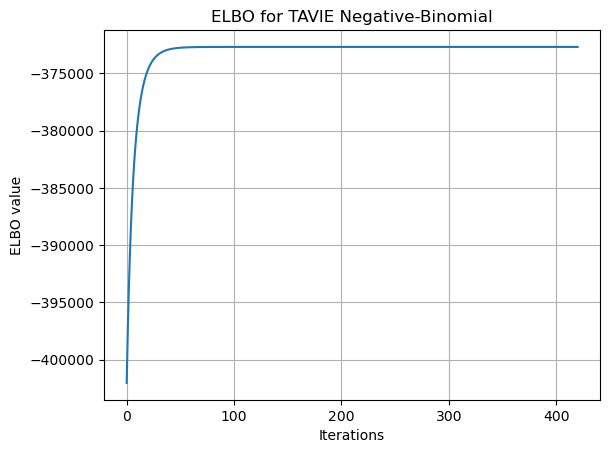

In [5]:
# Simulated data
n = 10000
p = 5
r = 20

# Design matrix, true regression coefficients and response
X = np.random.normal(size=(n, p))
beta_true = np.random.normal(loc=0.0, scale=1.0, size=p+1)
linear_term  = beta_true[0] + X @ beta_true[1:len(beta_true)] 
probs = 1 / (1 + np.exp(-linear_term))
y = np.random.negative_binomial(r, probs, size=n)

# Initialize the TAVIE model for negative-binomial likelihood
negbin_model = TAVIE_type_II(family="negbin", fit_intercept=True)
negbin_model.fit(X, y, r = r, verbose=True) # fit the TAVIE model

# true parameters
print("-------------True parameters----------")
print(f"beta: {beta_true}")

negbin_model.get_TAVIE_means(verbose=True) # get the TAVIE estimates
# obtain the variational estimates; use as required
variational_estimates = negbin_model.get_variational_estimates()
ELBO = negbin_model.get_elbo() # obtain the ELBO over iterations

plt.figure()
plt.plot(ELBO[6:len(ELBO)])
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.title("ELBO for TAVIE Negative-Binomial")
plt.grid(True)
plt.show()

### Application of TAVIE to Quantile Regression

In [6]:
# Data generation for Quantile Regression
def QR_data_gen(n, beta, sigma, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X = np.random.normal(loc=3.0, scale=2.0, size=(n, 1))
    # Laplace-like noise: random sign * exponential
    signs = np.random.choice([1, -1], size=n)
    noise = sigma * signs * np.random.exponential(scale=1.0, size=n)
    # Response
    y = beta[0] + X @ beta[1:len(beta)] + noise
    return {"y": y, "X": X}

QRdata_new = QR_data_gen(n=1000, beta=[0.5, 2], sigma=1, seed=2001)
X = QRdata_new["X"]
y = QRdata_new["y"]

quantiles = [0.1, 0.25, 0.5, 0.75, 0.95, 0.99]
colors = {
    0.1: "darkorange",
    0.25: "blue",
    0.5: "red",
    0.75: "green",
    0.95: "hotpink",
    0.99: "black"
}
linestyles = {
    0.1: "--",
    0.25: "--",
    0.5: "-",
    0.75: "--",
    0.95: "--",
    0.99: "--"
}

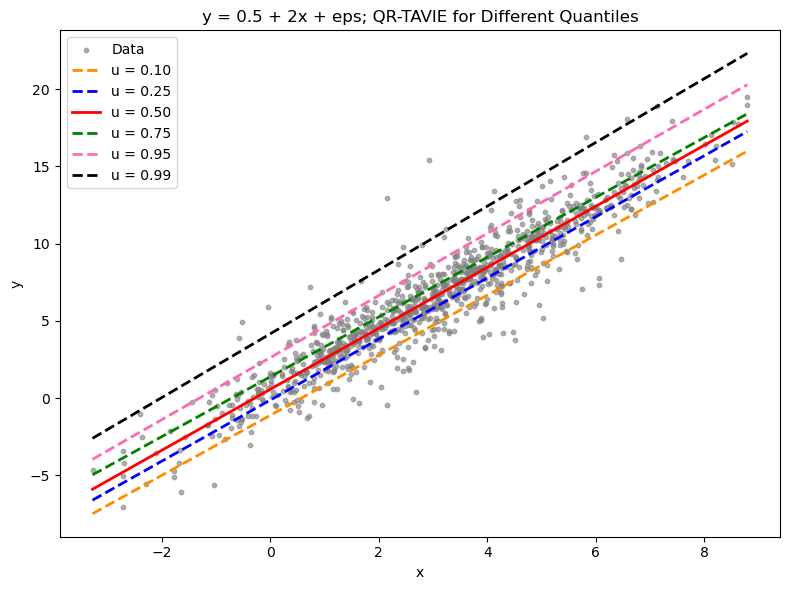

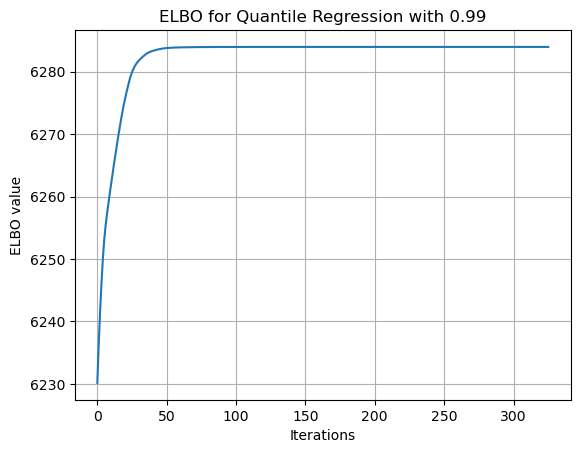

In [7]:
# Initializing the TAVIE model for quantile regression
QR_model = TAVIE_QR(fit_intercept=True)

# to store the results for different quantiles in action
results = {}
for u in quantiles:
    QR_model.fit(X, y, quantile=u, verbose=False) # fit the TAVIE QR model
    results[u] = QR_model.get_TAVIE_means(verbose=False) # get the TAVIE estimates

ELBO = QR_model.get_elbo() # get the ELBO for the last quantile
# get the variational estimates for the last quantile; and use as required
variational_estimates  = QR_model.get_variational_estimates()

x = X.reshape(1000, )
# Plot data and fitted quantile lines
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, alpha=0.6, label="Data", color="gray")

xs = np.linspace(x.min(), x.max(), 200)
for u in quantiles:
    mu0, mu1 = results[u]
    plt.plot(xs, mu0 + mu1 * xs,
             color=colors[u],
             linestyle=linestyles[u],
             linewidth=2,
             label=f"u = {u:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 0.5 + 2x + eps; QR-TAVIE for Different Quantiles")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(ELBO[6:len(ELBO)])
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.title(f"ELBO for Quantile Regression with {u}")
plt.grid(True)
plt.show()